In [ ]:
import os
import sys

src_path = r"D:\SEM 4\CS516\Yelp Fairness Review\scripts"
if src_path not in sys.path:
    sys.path.append(src_path)
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('../Yelp-JSON/yelp_dataset/new_cities_cleaned.csv')
print(df.shape)
df.head()


(22121, 35)


,review_id,user_id,business_id,stars_review,useful,funny,cool,text,date,name,...,is_marriott,is_hilton,is_hyatt,is_sheraton,is_westin,is_doubletree,is_holiday_inn,is_hotel,is_spa,is_restaurant
0,6ua_RuwuE78l3t51BhxE9Q,USywezFPwIHeg7hmSWuvQg,SEFujmfGZI08JWRyhIpYeQ,1.0,0,0,0,please don't waste your time making a reservat...,2021-07-16 13:20:09,Embassy Suites by Hilton Philadelphia Airport,...,False,True,False,False,False,False,False,True,False,False
1,6fSJNrKaxns85umEKEqgHw,ju-aM3uOhrh7q2hip7bPOg,QMHd6Z2djm_SBLzGhLvFqw,4.0,0,0,0,in town for a college football game. picked th...,2015-11-01 17:25:02,Courtyard by Marriott Philadelphia South at Th...,...,True,False,False,False,False,False,False,True,True,False
2,3hdr-kc_B9cPjR9SDDOPBg,cvpvJV6owKXR1RarDGM1HA,jMqEQYBIztLtcvnTujfHUA,5.0,3,0,1,i stay at this hotel during my occasional visi...,2021-04-22 12:06:29,Hyatt Centric Center City Philadelphia,...,False,False,True,False,False,False,False,True,True,False
3,Lj5oHi3GaU68rr0hFsUIAg,OY32TwbyMP1z6MIyirm0Yw,JKR09pJneafnwpUg0FNEzw,1.0,0,0,0,yet another hotel review from the road warrior...,2009-04-01 21:24:34,Hilton Garden Inn Philadelphia Center City,...,False,True,False,False,False,False,False,True,True,True
4,1CuaSJaooB8VLAp2CG2I9A,BQLc7jSHfPXDvleNFJ6lyg,d9T1Jgf4N2vY3dcMlnCgeA,3.0,0,0,0,"i am a big marriott fan. very nice staff, ever...",2013-05-10 11:30:27,Philadelphia Airport Marriott,...,True,False,False,False,False,False,False,True,True,False


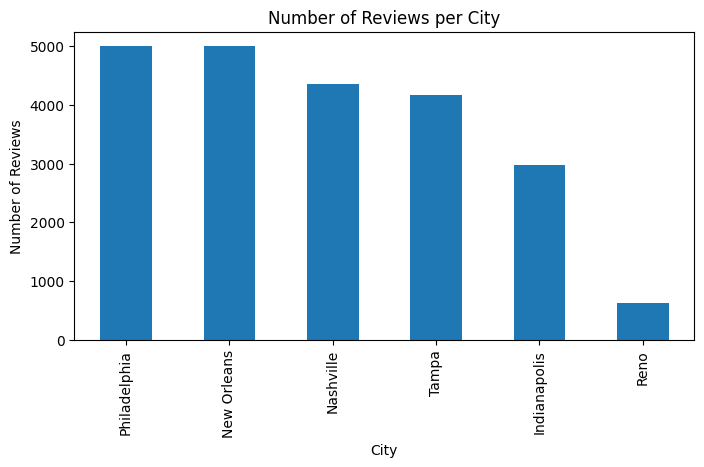

In [22]:
# Distribution by city
city_counts = df['city'].value_counts()
city_counts.plot(kind='bar', figsize=(8,4), title='Number of Reviews per City')
plt.xlabel('City')
plt.ylabel('Number of Reviews')
plt.show()

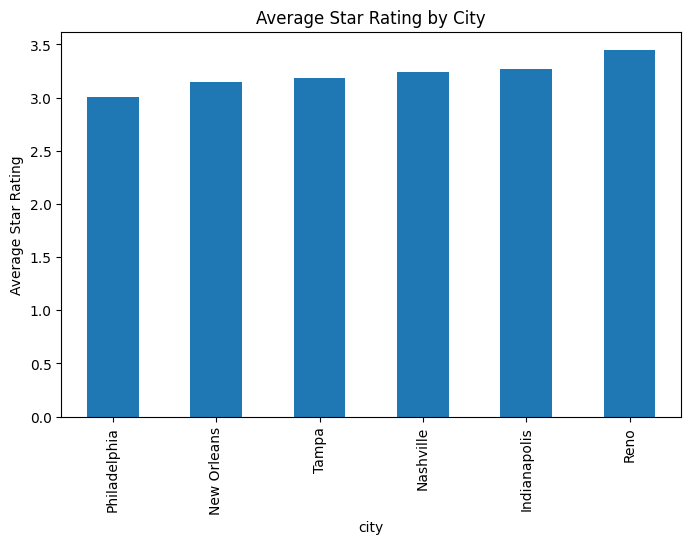

city
Philadelphia    3.004000
New Orleans     3.146000
Tampa           3.187335
Nashville       3.238336
Indianapolis    3.266891
Reno            3.447284
Name: stars_review, dtype: float64


In [23]:
# Average star rating by city
city_avg = df.groupby('city')['stars_review'].mean().sort_values()
city_avg.plot(kind='bar', figsize=(8,5), title='Average Star Rating by City')
plt.ylabel('Average Star Rating')
plt.show()
print(city_avg)

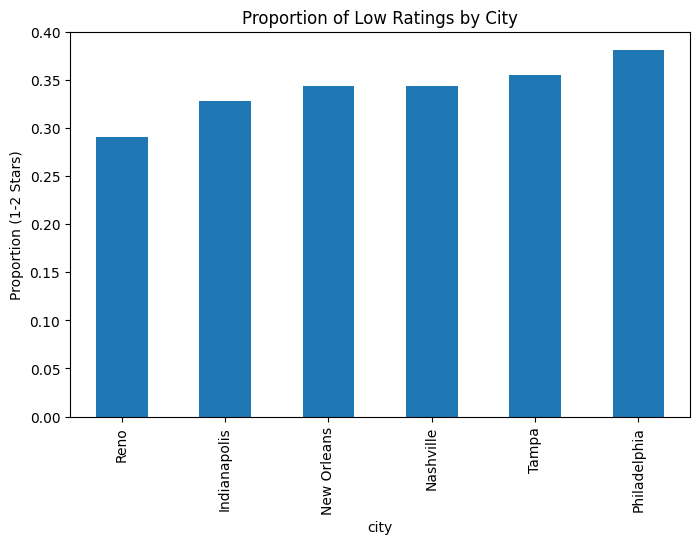

city
Reno            0.290735
Indianapolis    0.328067
New Orleans     0.343400
Nashville       0.343599
Tampa           0.354761
Philadelphia    0.381000
Name: low_rating, dtype: float64


In [24]:
# % of low ratings (1-2 stars) by city
df['low_rating'] = df['stars_review'] <= 2
low_rating_by_city = df.groupby('city')['low_rating'].mean().sort_values()
low_rating_by_city.plot(kind='bar', figsize=(8,5), title='Proportion of Low Ratings by City')
plt.ylabel('Proportion (1-2 Stars)')
plt.show()
print(low_rating_by_city)

Chain columns detected: ['is_open', 'is_marriott', 'is_hilton', 'is_hyatt', 'is_sheraton', 'is_westin', 'is_doubletree', 'is_holiday_inn']


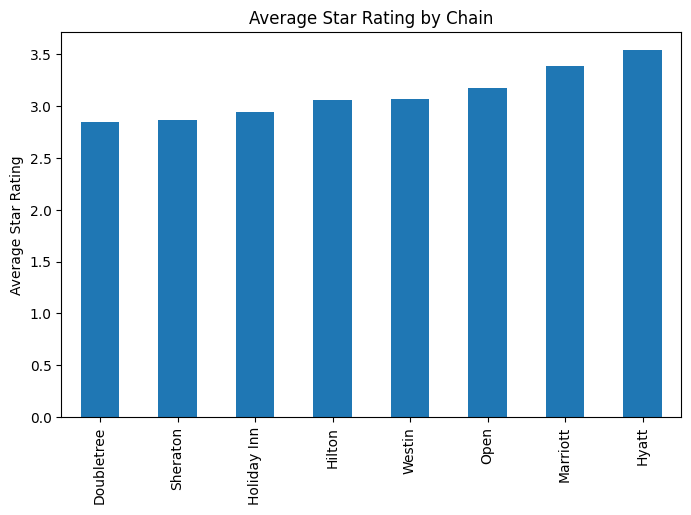

Doubletree     2.846886
Sheraton       2.867500
Holiday Inn    2.942564
Hilton         3.062492
Westin         3.065683
Open           3.176406
Marriott       3.382550
Hyatt          3.537379
dtype: float64


In [25]:
# Now filter for chain columns
chain_cols = [c for c in df.columns if c.startswith('is_') and c not in ['is_chain', 'is_hotel', 'is_spa', 'is_restaurant']]
print("Chain columns detected:", chain_cols)

# Proceed with your averages calculation
chain_avgs = {}
for chain in chain_cols:
    avg = df[df[chain] == True]['stars_review'].mean()
    chain_name = chain.replace('is_', '').replace('_', ' ').title()
    chain_avgs[chain_name] = avg

chain_avgs = pd.Series(chain_avgs).sort_values()
chain_avgs.plot(kind='bar', figsize=(8,5), title='Average Star Rating by Chain')
plt.ylabel('Average Star Rating')
plt.show()
print(chain_avgs)


In [29]:
chains = ['is_marriott', 'is_hilton', 'is_hyatt', 'is_sheraton', 'is_westin', 'is_doubletree', 'is_holiday_inn']
for chain in chains:
    chain_name = chain.replace('is_', '').replace('_', ' ').title()
    temp = df[df[chain]]
    print(f"\nAverage rating for {chain_name} by city:")
    print(temp.groupby('city')['stars_review'].mean())



Average rating for Marriott by city:
city
Indianapolis    3.533043
Nashville       3.384615
New Orleans     3.347301
Philadelphia    3.149856
Reno            3.089820
Tampa           3.626984
Name: stars_review, dtype: float64

Average rating for Hilton by city:
city
Indianapolis    3.248596
Nashville       3.228268
New Orleans     2.948905
Philadelphia    3.018962
Reno            3.293023
Tampa           2.951253
Name: stars_review, dtype: float64

Average rating for Hyatt by city:
city
Indianapolis    3.293930
Nashville       3.656398
New Orleans     3.277254
Philadelphia    3.566667
Reno            4.029240
Tampa           3.812632
Name: stars_review, dtype: float64

Average rating for Sheraton by city:
city
Indianapolis    2.742029
Nashville       3.014993
New Orleans     3.189189
Philadelphia    2.481858
Tampa           2.859122
Name: stars_review, dtype: float64

Average rating for Westin by city:
city
Indianapolis    3.186170
Nashville       3.229075
New Orleans     3.137184
Ph

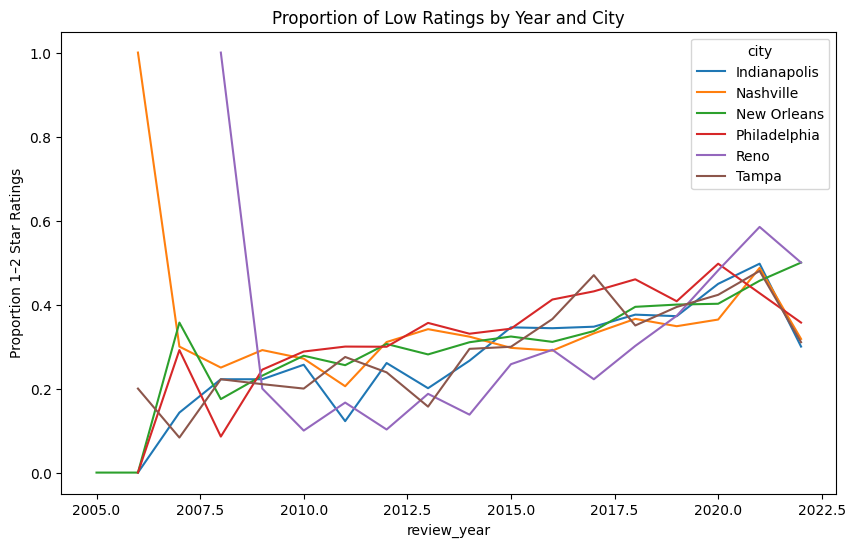

In [31]:
df['low_rating'] = df['stars_review'] <= 2
low_rating_trend = df.groupby(['review_year', 'city'])['low_rating'].mean().unstack()
low_rating_trend.plot(figsize=(10,6), title='Proportion of Low Ratings by Year and City')
plt.ylabel('Proportion 1–2 Star Ratings')
plt.show()


In [32]:
outlier_hotels = df.groupby(['business_id', 'name', 'city'])['stars_review'].mean().sort_values().head(10)
print("Lowest-rated hotels (systemic or local issues):")
print(outlier_hotels)


Lowest-rated hotels (systemic or local issues):
business_id             name                                                     city        
5-ZJE7qEtgGzypWNs9ausA  Holiday Inn Indianapolis Downtown                        Indianapolis    1.571429
PWkvPO5LKBoLPvha3rxMHg  Holiday Inn French Quarter-Chateau LeMoyne               New Orleans     1.800000
RZ1gi_Xa93bbx1y1tWIxMQ  Courtyard Marriott                                       Indianapolis    1.857143
3-69Zp0UWQafow9ilWDjvA  Holiday Inn Express New - Orleans Downtown               New Orleans     2.020408
U_wKqFYSpD8D3CBl7e8ENA  Holiday Inn Express & Suites Tampa Stadium Airport Area  Tampa           2.133333
H4Rv_BQU7we_PZmzLAP4ng  DoubleTree by Hilton Hotel Tampa Airport - Westshore     Tampa           2.226277
7YB0Vgi67h_dsxTI1ErVtA  Holiday Inn Express Indianapolis NW - Park 100           Indianapolis    2.250000
0DQr3ECefRNE0zsFKwd1fQ  Hilton Nashville Airport Hotel                           Nashville       2.271186
tvBz80VKCt

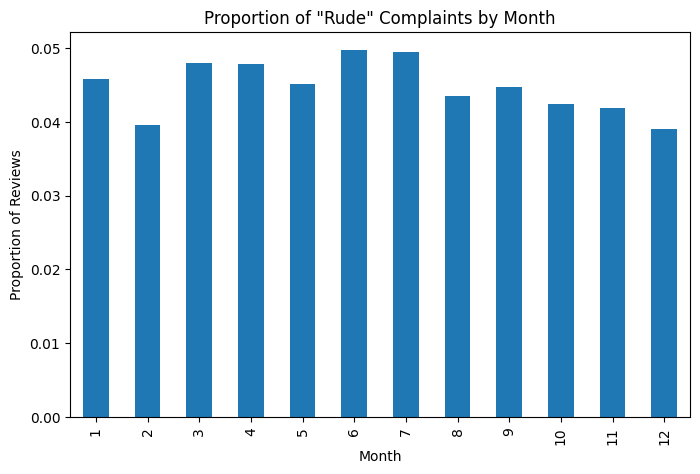

In [33]:
# Make sure review_month is in your DataFrame (add if needed)
df['review_month'] = pd.to_datetime(df['date']).dt.month
monthly_complaints = df.groupby('review_month')['has_rude'].mean()
monthly_complaints.plot(kind='bar', figsize=(8,5), title='Proportion of "Rude" Complaints by Month')
plt.ylabel('Proportion of Reviews')
plt.xlabel('Month')
plt.show()


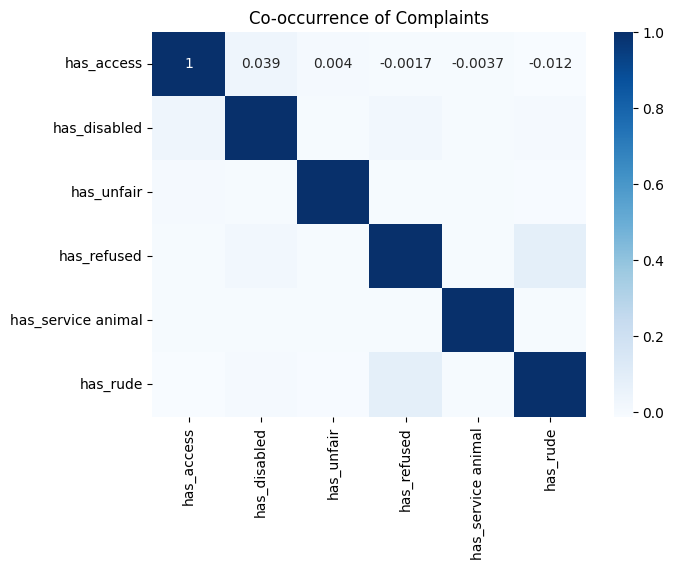

In [34]:
complaint_cols = ['has_access', 'has_disabled', 'has_unfair', 'has_refused', 'has_service animal', 'has_rude']
cooc = df[complaint_cols].corr()
plt.figure(figsize=(7,5))
sns.heatmap(cooc, annot=True, cmap='Blues')
plt.title('Co-occurrence of Complaints')
plt.show()


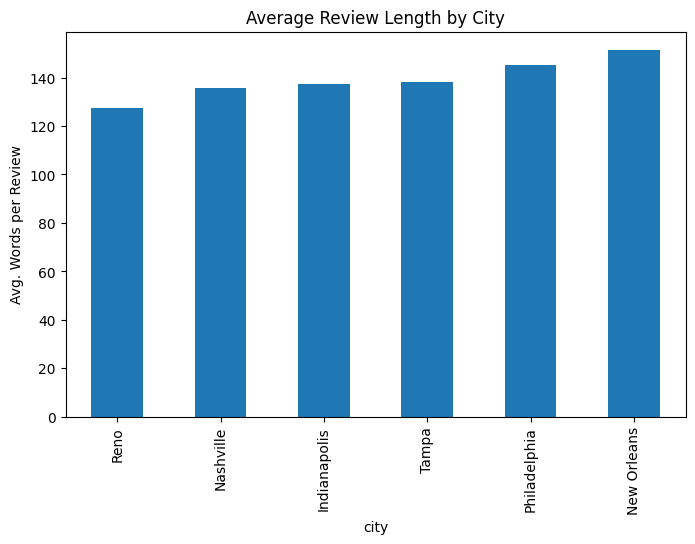

city
Reno            127.298722
Nashville       135.876120
Indianapolis    137.255798
Tampa           138.126889
Philadelphia    145.119000
New Orleans     151.450600
Name: text_length, dtype: float64


In [26]:
review_length_by_city = df.groupby('city')['text_length'].mean().sort_values()
review_length_by_city.plot(kind='bar', figsize=(8,5), title='Average Review Length by City')
plt.ylabel('Avg. Words per Review')
plt.show()
print(review_length_by_city)


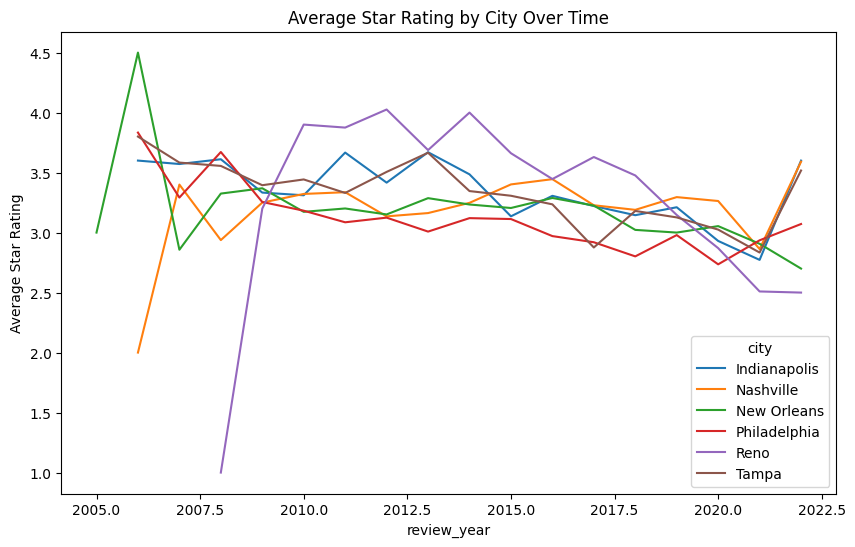

In [27]:
if 'review_year' in df.columns:
    city_year_trend = df.groupby(['review_year', 'city'])['stars_review'].mean().unstack()
    city_year_trend.plot(figsize=(10,6), title='Average Star Rating by City Over Time')
    plt.ylabel('Average Star Rating')
    plt.show()


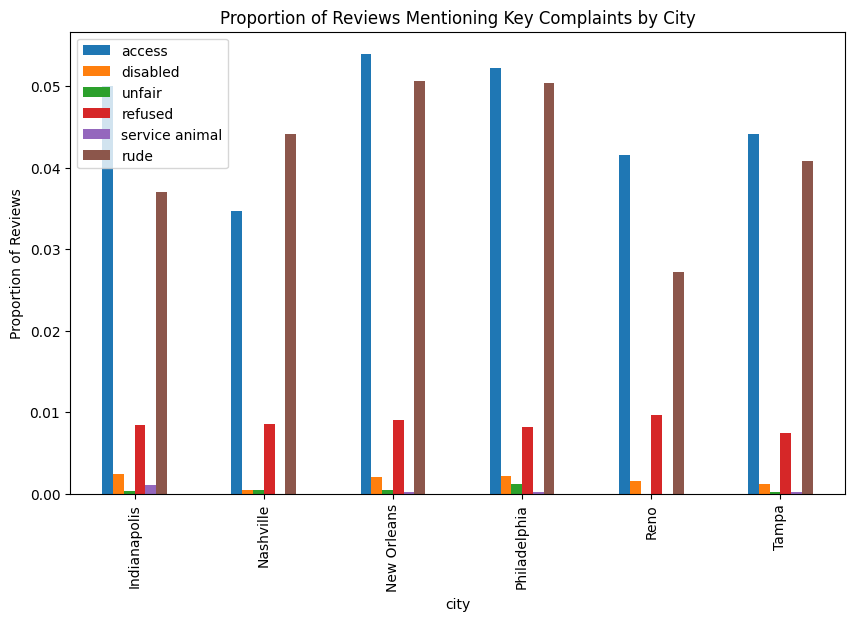

                access  disabled    unfair   refused  service animal      rude
city                                                                          
Indianapolis  0.050084  0.002353  0.000336  0.008403        0.001008  0.036975
Nashville     0.034705  0.000460  0.000460  0.008504        0.000000  0.044128
New Orleans   0.054000  0.002000  0.000400  0.009000        0.000200  0.050600
Philadelphia  0.052200  0.002200  0.001200  0.008200        0.000200  0.050400
Reno          0.041534  0.001597  0.000000  0.009585        0.000000  0.027157
Tampa         0.044135  0.001199  0.000240  0.007436        0.000240  0.040777


In [28]:
keywords = ['access', 'disabled', 'unfair', 'refused', 'service animal', 'rude']
for kw in keywords:
    df[f'has_{kw}'] = df['text'].str.contains(kw, case=False, na=False)

complaints_by_city = {kw: df.groupby('city')[f'has_{kw}'].mean() for kw in keywords}
complaints_df = pd.DataFrame(complaints_by_city)
complaints_df.plot(kind='bar', figsize=(10,6), title='Proportion of Reviews Mentioning Key Complaints by City')
plt.ylabel('Proportion of Reviews')
plt.show()
print(complaints_df)
